In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 02. Data Tidying and Cleaning
### Preparing data for knowledge extraction
Topics:
* Tidy data: properties, normalization;
* Subsetting and sorting;
* Reshaping;
* Data summarization and aggregation;
* Combining datasets;
* Data transformation;
* Data cleaning process.

In [1]:
# Quick check
print("We are ready for action! :)")

We are ready for action! :)


### 01. Data Tidying
Arranging data un meaningful manner

* Columns - attributes (features, variables)
* Rows - observations
* Cells - values(one observation of one feature)
* All other data is called **messy data**

Empirecal rule for testing whether a dataset is tidy: *Adding one more observation should create one new row*
 * No new columns
 * No multiple rows
 * No partial rows, no changes to other rows

In [4]:
pew = pd.read_csv("data/pew.csv")

In [6]:
# It seems like this is pivot table. But pivot table is not tidy data
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


Said more generally - If we want to add one entry, we need to edit a row. *Which is not the case in tidy data.* To add an entry, we need to add a row, not to edit already existing one. 

In [9]:
# To tidy the data we could use the melt() function.

pew_tidy = pew.melt(
    id_vars = ["religion"],
    var_name = "income",
    value_name = "frequency"
)
# @param id_vars - Stays unchanged
# @param var_name - Variable name
# @param value_name - Value name

In [10]:
pew_tidy

,religion,income,frequency
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [15]:
tb = pd.read_csv("data/tb.csv")
# @param na_values - Specify a NaN signiture 

In [14]:
tb

,iso2,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,ZW,2004,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,366.0,...,NaN,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,ZW,2005,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,295.0,...,NaN,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,ZW,2006,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,348.0,...,NaN,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,ZW,2007,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,292.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN


So, here we have a problem. The Namibia (NA) iso code is identified as NaN. So, let's "tidy" the data.

In [17]:
tb.loc[tb.iso2.isna(), "iso2"] = "NA"

In [18]:
tb[tb.iso2.isna()]

,iso2,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu


So in this way, we just added `" "` around the `NA` iso2 code, and now pandas does not recognize it as NaN

In [21]:
# Side note: Never ask if NaN is equal to NaN. It is equal to nothing.
float("NaN") == float("NaN")

False

For this purpose we use the `.isna()` method. (or with `is` in python)

In [22]:
tb.dtypes

iso2      object
year       int64
m04      float64
m514     float64
m014     float64
m1524    float64
m2534    float64
m3544    float64
m4554    float64
m5564    float64
m65      float64
mu       float64
f04      float64
f514     float64
f014     float64
f1524    float64
f2534    float64
f3544    float64
f4554    float64
f5564    float64
f65      float64
fu       float64
dtype: object

In [24]:
tb.describe().T

,count,mean,std,min,25%,50%,75%,max
year,5769.0,1994.229329,8.423265,1980.0,1987.0,1994.0,2002.00,2008.0
m04,392.0,8.806122,46.094789,0.0,0.0,0.0,2.00,655.0
m514,401.0,28.975062,127.881505,0.0,0.0,1.0,8.00,1519.0
m014,2381.0,79.438051,280.489536,0.0,0.0,6.0,36.00,4648.0
m1524,2407.0,922.364769,4278.638975,0.0,10.0,92.0,511.50,77121.0
m2534,2408.0,1301.894518,5253.398971,0.0,15.0,151.5,728.00,83850.0
m3544,2415.0,1205.566046,5409.064589,0.0,16.0,134.0,591.50,90498.0
m4554,2421.0,983.515489,4780.782748,0.0,13.0,98.0,434.00,78815.0
m5564,2414.0,696.171914,3771.934518,0.0,9.0,62.0,273.75,57492.0
m65,2408.0,609.440615,3660.224592,0.0,8.0,53.0,227.25,70376.0


In [25]:
tb.head()

,iso2,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
tb.columns

Index(['iso2', 'year', 'm04', 'm514', 'm014', 'm1524', 'm2534', 'm3544',
       'm4554', 'm5564', 'm65', 'mu', 'f04', 'f514', 'f014', 'f1524', 'f2534',
       'f3544', 'f4554', 'f5564', 'f65', 'fu'],
      dtype='object')

Quick note! 
* iso2 - country code
* m04 - Male from 0 to 4 years old
* m3544 - Male from 35 to 44 years old
* f1524 - Female from 15 to 24 years old
* fu - Female in unknown numbers old

For data science `NaN` means *"It does not exist"*. So `0` is not equal to NaN, either.

In [28]:
tb_tidy = tb.melt(id_vars = ["iso2", "year"], var_name = "sex_and_age", value_name = "cases")

In [29]:
tb_tidy

,iso2,year,sex_and_age,cases
0,AD,1989,m04,NaN
1,AD,1990,m04,NaN
2,AD,1991,m04,NaN
3,AD,1992,m04,NaN
4,AD,1993,m04,NaN
...,...,...,...,...
115375,ZW,2004,fu,NaN
115376,ZW,2005,fu,NaN
115377,ZW,2006,fu,NaN
115378,ZW,2007,fu,NaN


In [32]:
tb_tidy = tb_tidy.dropna() # Removes the NaN values

In [33]:
tb_tidy

,iso2,year,sex_and_age,cases
15,AD,2005,m04,0.0
16,AD,2006,m04,0.0
18,AD,2008,m04,0.0
42,AE,2006,m04,0.0
43,AE,2007,m04,0.0
...,...,...,...,...
115195,VU,2008,fu,0.0
115269,YE,2008,fu,0.0
115323,ZA,2008,fu,0.0
115350,ZM,2008,fu,0.0


In [41]:
# Get only the first character
tb_tidy.sex_and_age.str.slice(0, 1)

15        m
16        m
18        m
42        m
43        m
         ..
115195    f
115269    f
115323    f
115350    f
115379    f
Name: sex_and_age, Length: 35750, dtype: object

In [38]:
tb_tidy["sex"] = tb_tidy.sex_and_age.str.slice(0, 1)

/tmp/ipykernel_2971/847371749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_tidy["sex"] = tb_tidy.sex_and_age.str.slice(0, 1)


In [40]:
tb_tidy["age_group"] = tb_tidy.sex_and_age.str.slice(1)

/tmp/ipykernel_2971/870201294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_tidy["age_group"] = tb_tidy.sex_and_age.str.slice(1)


This way we added two more columns, so we splitted the `age group` and `sex` data.

In [43]:
tb_tidy # As we can see, the two new columns are here

,iso2,year,sex_and_age,cases,sex,age_group
15,AD,2005,m04,0.0,m,04
16,AD,2006,m04,0.0,m,04
18,AD,2008,m04,0.0,m,04
42,AE,2006,m04,0.0,m,04
43,AE,2007,m04,0.0,m,04
...,...,...,...,...,...,...
115195,VU,2008,fu,0.0,f,u
115269,YE,2008,fu,0.0,f,u
115323,ZA,2008,fu,0.0,f,u
115350,ZM,2008,fu,0.0,f,u


But as we can see, we don't need the column `sex_and_age`. So let's just drop it.

In [45]:
tb_tidy = tb_tidy.drop(columns = ["sex_and_age"])

In [46]:
tb_tidy

,iso2,year,cases,sex,age_group
15,AD,2005,0.0,m,04
16,AD,2006,0.0,m,04
18,AD,2008,0.0,m,04
42,AE,2006,0.0,m,04
43,AE,2007,0.0,m,04
...,...,...,...,...,...
115195,VU,2008,0.0,f,u
115269,YE,2008,0.0,f,u
115323,ZA,2008,0.0,f,u
115350,ZM,2008,0.0,f,u


In [51]:
# Method for auto renaming the age groups
def process_age_group(age_group):
    ages = {"04": "0-4", "65": "65+", "u": "unknown"}
    if age_group in ages:
        return ages[age_group]
    else:
        return f"{age_group[:-2]}-{age_group[-2:]}"

In [53]:
tb_tidy.age_group = tb_tidy.age_group.apply(process_age_group)
# apply - Apply a function to all entries

In [54]:
tb_tidy

,iso2,year,cases,sex,age_group
15,AD,2005,0.0,m,0-4
16,AD,2006,0.0,m,0-4
18,AD,2008,0.0,m,0-4
42,AE,2006,0.0,m,0-4
43,AE,2007,0.0,m,0-4
...,...,...,...,...,...
115195,VU,2008,0.0,f,unknown
115269,YE,2008,0.0,f,unknown
115323,ZA,2008,0.0,f,unknown
115350,ZM,2008,0.0,f,unknown


In [57]:
# Let's quickly sort it
tb_tidy = tb_tidy.sort_values(["iso2", "year"])

In [58]:
tb_tidy

,iso2,year,cases,sex,age_group
11544,AD,1996,0.0,m,0-14
17313,AD,1996,0.0,m,15-24
23082,AD,1996,0.0,m,25-34
28851,AD,1996,4.0,m,35-44
34620,AD,1996,1.0,m,45-54
...,...,...,...,...,...
92303,ZW,2008,2890.0,f,35-44
98072,ZW,2008,467.0,f,45-54
103841,ZW,2008,174.0,f,55-64
109610,ZW,2008,105.0,f,65+


So now, let's just compare the two datasets - The first one, and the tidy one

In [59]:
tb

,iso2,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,ZW,2004,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,366.0,...,NaN,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,ZW,2005,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,295.0,...,NaN,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,ZW,2006,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,348.0,...,NaN,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,ZW,2007,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,292.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN


In [60]:
tb_tidy

,iso2,year,cases,sex,age_group
11544,AD,1996,0.0,m,0-14
17313,AD,1996,0.0,m,15-24
23082,AD,1996,0.0,m,25-34
28851,AD,1996,4.0,m,35-44
34620,AD,1996,1.0,m,45-54
...,...,...,...,...,...
92303,ZW,2008,2890.0,f,35-44
98072,ZW,2008,467.0,f,45-54
103841,ZW,2008,174.0,f,55-64
109610,ZW,2008,105.0,f,65+


We could see, that the second one is waaay more readable and easy to manipulate.

In [122]:
weather_data = pd.read_csv("data/weather.csv")

In [123]:
# Yet another messy dataset
weather_data

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MX17004,2010,3,tmin,NaN,NaN,NaN,NaN,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MX17004,2010,4,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36.3,NaN,NaN,NaN,NaN
7,MX17004,2010,4,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.7,NaN,NaN,NaN,NaN
8,MX17004,2010,5,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.2,NaN,NaN,NaN,NaN
9,MX17004,2010,5,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.2,NaN,NaN,NaN,NaN


In [124]:
weather_data.element.unique()

array(['tmax', 'tmin'], dtype=object)

As we can see from the cell above - to add a new entry, we should edit two rows, because of `tmax` and `tmin`. It looks like the data is really messy xD 

In [125]:
# Let's first clean up the columns
weather_data_tidy = weather_data.melt(id_vars = ["id", "year", "month", "element"], var_name = "day")

In [126]:
weather_data_tidy

,id,year,month,element,day,value
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN
...,...,...,...,...,...,...
677,MX17004,2010,10,tmin,d31,NaN
678,MX17004,2010,11,tmax,d31,NaN
679,MX17004,2010,11,tmin,d31,NaN
680,MX17004,2010,12,tmax,d31,NaN


In [127]:
# But as we can see, we have some d-s in front of our day variable
weather_data_tidy.day.unique()

array(['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11',
       'd12', 'd13', 'd14', 'd15', 'd16', 'd17', 'd18', 'd19', 'd20',
       'd21', 'd22', 'd23', 'd24', 'd25', 'd26', 'd27', 'd28', 'd29',
       'd30', 'd31'], dtype=object)

In [128]:
# So we could do something like this
weather_data_tidy.day.str.slice(1)

0       1
1       1
2       1
3       1
4       1
       ..
677    31
678    31
679    31
680    31
681    31
Name: day, Length: 682, dtype: object

But as we can see, the `dtype` remains a `object`. For this kind of scenario, we have the method `.astype()`.

In [129]:
weather_data_tidy.day.str.slice(1).astype(int)

0       1
1       1
2       1
3       1
4       1
       ..
677    31
678    31
679    31
680    31
681    31
Name: day, Length: 682, dtype: int64

In [130]:
weather_data_tidy.day = weather_data_tidy.day.str.slice(1).astype(int)
# weather_data_tidy["day"] = weather_data_tidy.day.str.slice(1).astype(int)

In [131]:
weather_data_tidy

,id,year,month,element,day,value
0,MX17004,2010,1,tmax,1,NaN
1,MX17004,2010,1,tmin,1,NaN
2,MX17004,2010,2,tmax,1,NaN
3,MX17004,2010,2,tmin,1,NaN
4,MX17004,2010,3,tmax,1,NaN
...,...,...,...,...,...,...
677,MX17004,2010,10,tmin,31,NaN
678,MX17004,2010,11,tmax,31,NaN
679,MX17004,2010,11,tmin,31,NaN
680,MX17004,2010,12,tmax,31,NaN


In [132]:
# now that our "tmax" and "tmin" are too melted, we need to do the oposite - pivot them

weather_data_tidy = weather_data_tidy.pivot_table(
    index = ["id", "year", "month", "day"],
    columns = ["element"],
    values = "value",
    #dropna = False
)

# @param index - What we have by rows
# @param columns - What we have by columns
# @param values - What we have in each row

In [133]:
weather_data_tidy

element                 tmax  tmin
id      year month day            
MX17004 2010 1     30   27.8  14.5
             2     2    27.3  14.4
                   3    24.1  14.4
                   11   29.7  13.4
                   23   29.9  10.7
             3     5    32.1  14.2
                   10   34.5  16.8
                   16   31.1  17.6
             4     27   36.3  16.7
             5     27   33.2  18.2
             6     17   28.0  17.5
                   29   30.1  18.0
             7     3    28.6  17.5
                   14   29.9  16.5
             8     23   26.4  15.0
                   5    29.6  15.8
                   29   28.0  15.3
                   8    29.0  17.3
                   13   29.8  16.5
                   25   29.7  15.6
                   31   25.4  15.4
             10    5    27.0  14.0
                   14   29.5  13.0
                   7    28.1  12.9
                   15   28.7  10.5
                   28   31.2  15.0
             11    2    31.3  16.3
                   5    26.3   7.9
                   27   27.7  14.2
                   4    27.2  12.0
                   26   28.1  12.1
             12    1    29.9  13.8
                   6    27.8  10.5

But doesn't it look kind of odd? Yeah, this is the tidy format, but it is not so readable. So let's check what could be the problem.

In [134]:
type(weather_data_tidy)

pandas.core.frame.DataFrame

In [135]:
weather_data_tidy.index

MultiIndex([('MX17004', 2010,  1, 30),
            ('MX17004', 2010,  2,  2),
            ('MX17004', 2010,  2,  3),
            ('MX17004', 2010,  2, 11),
            ('MX17004', 2010,  2, 23),
            ('MX17004', 2010,  3,  5),
            ('MX17004', 2010,  3, 10),
            ('MX17004', 2010,  3, 16),
            ('MX17004', 2010,  4, 27),
            ('MX17004', 2010,  5, 27),
            ('MX17004', 2010,  6, 17),
            ('MX17004', 2010,  6, 29),
            ('MX17004', 2010,  7,  3),
            ('MX17004', 2010,  7, 14),
            ('MX17004', 2010,  8, 23),
            ('MX17004', 2010,  8,  5),
            ('MX17004', 2010,  8, 29),
            ('MX17004', 2010,  8,  8),
            ('MX17004', 2010,  8, 13),
            ('MX17004', 2010,  8, 25),
            ('MX17004', 2010,  8, 31),
            ('MX17004', 2010, 10,  5),
            ('MX17004', 2010, 10, 14),
            ('MX17004', 2010, 10,  7),
            ('MX17004', 2010, 10, 15),
            ('MX17004', 2

Ah, yeah, we have `MultiIndex`. And we said that we want it, remember? `index = ["id", "year", "month", "day"]`. To get it in the variant that we want, we could use the `.reset_index()` method.

In [136]:
weather_data_tidy = weather_data_tidy.reset_index()
# @param drop - Remove the old "index" column

In [137]:
weather_data_tidy

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,30,27.8,14.5
1,MX17004,2010,2,2,27.3,14.4
2,MX17004,2010,2,3,24.1,14.4
3,MX17004,2010,2,11,29.7,13.4
4,MX17004,2010,2,23,29.9,10.7
5,MX17004,2010,3,5,32.1,14.2
6,MX17004,2010,3,10,34.5,16.8
7,MX17004,2010,3,16,31.1,17.6
8,MX17004,2010,4,27,36.3,16.7
9,MX17004,2010,5,27,33.2,18.2


In [139]:
# The "element" column does not exist, becouse it is what we got from the columns
weather_data_tidy.element

AttributeError: 'DataFrame' object has no attribute 'element'

In [140]:
# To switch the order we could do something like this
weather_data_tidy = weather_data_tidy[["id", "day", "month", "year", "tmin", "tmax"]]

In [ ]:
weather_data_tidy

In [141]:
# The square brackets give us the columns we need. The dot and the square brackets are used the same way
weather_data_tidy.day == weather_data_tidy["day"]

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
Name: day, dtype: bool

In [142]:
weather_data_tidy["day"]

0     30
1      2
2      3
3     11
4     23
5      5
6     10
7     16
8     27
9     27
10    17
11    29
12     3
13    14
14    23
15     5
16    29
17     8
18    13
19    25
20    31
21     5
22    14
23     7
24    15
25    28
26     2
27     5
28    27
29     4
30    26
31     1
32     6
Name: day, dtype: int64

In [143]:
# If we pass a list in them, it would return a table containing the rows and columns we need
# We could also use the .sort_values method to sort by given criteria
weather_data_tidy[["day", "month", "year"]].sort_values("day")

element,day,month,year
31,1,12,2010
1,2,2,2010
26,2,11,2010
2,3,2,2010
12,3,7,2010
29,4,11,2010
5,5,3,2010
15,5,8,2010
27,5,11,2010
21,5,10,2010


In [144]:
# Something interesting to look for
type(weather_data_tidy["day"])

pandas.core.series.Series

In [145]:
type(weather_data_tidy[["day"]])

pandas.core.frame.DataFrame

If we pass only a string in the brackets, it returns a `Series`, but if we pass a list, *even if it contains only one element*, we get `DataFrame`.

In [146]:
# Another cool usefull method is "to_datetime"
weather_data_tidy["date"] = pd.to_datetime(weather_data_tidy[["year", "month", "day"]])

/tmp/ipykernel_2971/1692817840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_tidy["date"] = pd.to_datetime(weather_data_tidy[["year", "month", "day"]])


In [147]:
weather_data_tidy

element,id,day,month,year,tmin,tmax,date
0,MX17004,30,1,2010,14.5,27.8,2010-01-30
1,MX17004,2,2,2010,14.4,27.3,2010-02-02
2,MX17004,3,2,2010,14.4,24.1,2010-02-03
3,MX17004,11,2,2010,13.4,29.7,2010-02-11
4,MX17004,23,2,2010,10.7,29.9,2010-02-23
5,MX17004,5,3,2010,14.2,32.1,2010-03-05
6,MX17004,10,3,2010,16.8,34.5,2010-03-10
7,MX17004,16,3,2010,17.6,31.1,2010-03-16
8,MX17004,27,4,2010,16.7,36.3,2010-04-27
9,MX17004,27,5,2010,18.2,33.2,2010-05-27


In [149]:
# And we could possibly want to drop the old columns
weather_data_tidy = weather_data_tidy.drop(columns = ["year", "month", "day"])

In [150]:
weather_data_tidy

element,id,tmin,tmax,date
0,MX17004,14.5,27.8,2010-01-30
1,MX17004,14.4,27.3,2010-02-02
2,MX17004,14.4,24.1,2010-02-03
3,MX17004,13.4,29.7,2010-02-11
4,MX17004,10.7,29.9,2010-02-23
5,MX17004,14.2,32.1,2010-03-05
6,MX17004,16.8,34.5,2010-03-10
7,MX17004,17.6,31.1,2010-03-16
8,MX17004,16.7,36.3,2010-04-27
9,MX17004,18.2,33.2,2010-05-27


In [153]:
# And we could even drop the id and reorder it
weather_data_tidy = weather_data_tidy[["date", "tmin", "tmax"]]

In [154]:
weather_data_tidy

element,date,tmin,tmax
0,2010-01-30,14.5,27.8
1,2010-02-02,14.4,27.3
2,2010-02-03,14.4,24.1
3,2010-02-11,13.4,29.7
4,2010-02-23,10.7,29.9
5,2010-03-05,14.2,32.1
6,2010-03-10,16.8,34.5
7,2010-03-16,17.6,31.1
8,2010-04-27,16.7,36.3
9,2010-05-27,18.2,33.2


In [156]:
# And if we really like our new dataset, we could export it
weather_data_tidy.to_csv("data/weather_tidy.csv", index = None)

# @param index - Show the index

In [159]:
billboard = pd.read_csv("data/billboard.csv")

In [160]:
billboard

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
# Let's see who stayed the longest
billboard[billboard.wk65.notna()] # Done with quick iteration over the weeks :)

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
62,2000,Creed,Higher,5:16,1999-09-11,81,77.0,73.0,63.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
# Now here is a quick example how we could rename a column
billboard = billboard.rename(columns = {"date.entered" : "date_entered"})

In [165]:
billboard

,year,artist,track,time,date_entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
billboard_tidy = billboard.melt(
    id_vars = ["year", "artist", "track", "time", "date_entered"], 
    var_name = "week", 
    value_name = "position"
)

In [169]:
billboard_tidy

,year,artist,track,time,date_entered,week,position
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [172]:
# Do we always have "wk" at the beginning? - yep
billboard_tidy.week.unique()

array(['wk1', 'wk2', 'wk3', 'wk4', 'wk5', 'wk6', 'wk7', 'wk8', 'wk9',
       'wk10', 'wk11', 'wk12', 'wk13', 'wk14', 'wk15', 'wk16', 'wk17',
       'wk18', 'wk19', 'wk20', 'wk21', 'wk22', 'wk23', 'wk24', 'wk25',
       'wk26', 'wk27', 'wk28', 'wk29', 'wk30', 'wk31', 'wk32', 'wk33',
       'wk34', 'wk35', 'wk36', 'wk37', 'wk38', 'wk39', 'wk40', 'wk41',
       'wk42', 'wk43', 'wk44', 'wk45', 'wk46', 'wk47', 'wk48', 'wk49',
       'wk50', 'wk51', 'wk52', 'wk53', 'wk54', 'wk55', 'wk56', 'wk57',
       'wk58', 'wk59', 'wk60', 'wk61', 'wk62', 'wk63', 'wk64', 'wk65',
       'wk66', 'wk67', 'wk68', 'wk69', 'wk70', 'wk71', 'wk72', 'wk73',
       'wk74', 'wk75', 'wk76'], dtype=object)

In [173]:
# Other alternative to that
billboard_tidy.week.str.startswith("wk").all()

True

In [175]:
billboard_tidy.week.str.slice(2).astype(int)

0         1
1         1
2         1
3         1
4         1
         ..
24087    76
24088    76
24089    76
24090    76
24091    76
Name: week, Length: 24092, dtype: int64

In [176]:
# Now we need to override it in the actual dataset
billboard_tidy["week"] = billboard_tidy.week.str.slice(2).astype(int)

In [177]:
billboard_tidy

,year,artist,track,time,date_entered,week,position
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,76,NaN


**Note!!** If we are overriding, we could use the `.` for indexing. But if we are creating a new column, we should always use the square brackets `dataset["new_column"] = example`.

In [179]:
# This drops all entries, which have NaN somewhere inside of them
billboard_tidy = billboard_tidy.dropna()

In [180]:
billboard_tidy

,year,artist,track,time,date_entered,week,position
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,1,57.0
...,...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,1999-09-11,63,50.0
19833,2000,Lonestar,Amazed,4:25,1999-06-05,63,45.0
20033,2000,Creed,Higher,5:16,1999-09-11,64,50.0
20150,2000,Lonestar,Amazed,4:25,1999-06-05,64,50.0


In [183]:
# The year column is with the same value, so we could remove it
billboard_tidy.year.unique()

billboard_tidy = billboard_tidy[["artist", "track", "time", "date_entered", "week", "position"]]

In [184]:
billboard_tidy

,artist,track,time,date_entered,week,position
0,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87.0
1,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91.0
2,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81.0
3,3 Doors Down,Loser,4:24,2000-10-21,1,76.0
4,504 Boyz,Wobble Wobble,3:35,2000-04-15,1,57.0
...,...,...,...,...,...,...
19716,Creed,Higher,5:16,1999-09-11,63,50.0
19833,Lonestar,Amazed,4:25,1999-06-05,63,45.0
20033,Creed,Higher,5:16,1999-09-11,64,50.0
20150,Lonestar,Amazed,4:25,1999-06-05,64,50.0


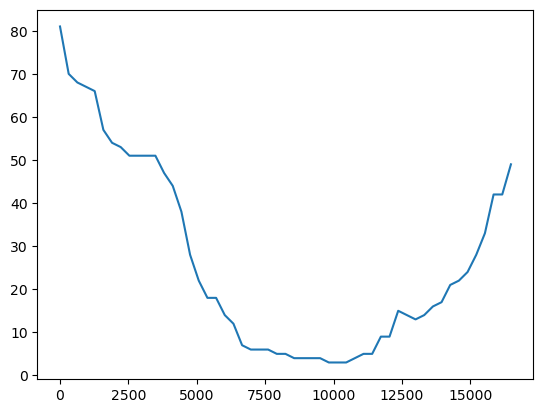

In [190]:
# We could plot this. But as we can see, there are a lot of entries for the same track
plt.plot(billboard_tidy[
    (billboard_tidy.artist == "3 Doors Down") &
    (billboard_tidy.track == "Kryptonite")
].position)
plt.show()

In [194]:
# To remove the duplicates
billboard_tidy[["track", "artist", "time"]].drop_duplicates(ignore_index = True)

# @param ignore_index - To make sure that the index is unique

,track,artist,time
0,Baby Don't Cry (Keep...,2 Pac,4:22
1,The Hardest Part Of ...,2Ge+her,3:15
2,Kryptonite,3 Doors Down,3:53
3,Loser,3 Doors Down,4:24
4,Wobble Wobble,504 Boyz,3:35
...,...,...,...
312,Another Nine Minutes,Yankee Grey,3:10
313,Real Live Woman,"Yearwood, Trisha",3:55
314,Whistle While You Tw...,Ying Yang Twins,4:19
315,Kernkraft 400,Zombie Nation,3:30


### 02. Operations on Datasets
Basic tools to get started working with messy data

#### 01. Subsetting Rows
Selecting only some rows (aka **selection**)

In [198]:
# We could use the .head method, to get the first few rows of data
billboard_tidy.head(20)

# @param - the number of rows we want (default: 5)

,artist,track,time,date_entered,week,position
0,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87.0
1,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91.0
2,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81.0
3,3 Doors Down,Loser,4:24,2000-10-21,1,76.0
4,504 Boyz,Wobble Wobble,3:35,2000-04-15,1,57.0
5,98^0,Give Me Just One Nig...,3:24,2000-08-19,1,51.0
6,A*Teens,Dancing Queen,3:44,2000-07-08,1,97.0
7,Aaliyah,I Don't Wanna,4:15,2000-01-29,1,84.0
8,Aaliyah,Try Again,4:03,2000-03-18,1,59.0
9,"Adams, Yolanda",Open My Heart,5:30,2000-08-26,1,76.0


In [199]:
# Alternatively, we could use the .tail method to get the last few rows
billboard_tidy.tail(20)

,artist,track,time,date_entered,week,position
17297,Lonestar,Amazed,4:25,1999-06-05,55,22.0
17497,Creed,Higher,5:16,1999-09-11,56,26.0
17614,Lonestar,Amazed,4:25,1999-06-05,56,25.0
17814,Creed,Higher,5:16,1999-09-11,57,29.0
17931,Lonestar,Amazed,4:25,1999-06-05,57,26.0
18131,Creed,Higher,5:16,1999-09-11,58,32.0
18248,Lonestar,Amazed,4:25,1999-06-05,58,31.0
18448,Creed,Higher,5:16,1999-09-11,59,39.0
18565,Lonestar,Amazed,4:25,1999-06-05,59,32.0
18765,Creed,Higher,5:16,1999-09-11,60,39.0


In [201]:
# Get the first few smallest on a given column
billboard_tidy.nsmallest(3, "position")

# @param number_of_rows - the number of returned columns
# @param column - the name of the column for checking

,artist,track,time,date_entered,week,position
1776,Madonna,Music,3:45,2000-08-12,6,1.0
2093,Madonna,Music,3:45,2000-08-12,7,1.0
2232,"Aguilera, Christina",What A Girl Wants,3:18,1999-11-27,8,1.0


In [203]:
# Alternativelly, we have the .nlargest method, which returns the largest n-count rows by given column
weather_data_tidy.nlargest(10, "tmax")

element,date,tmin,tmax
8,2010-04-27,16.7,36.3
6,2010-03-10,16.8,34.5
9,2010-05-27,18.2,33.2
5,2010-03-05,14.2,32.1
26,2010-11-02,16.3,31.3
25,2010-10-28,15.0,31.2
7,2010-03-16,17.6,31.1
11,2010-06-29,18.0,30.1
4,2010-02-23,10.7,29.9
13,2010-07-14,16.5,29.9


#### 02. Subsetting Column
Selecting only some columns (aka **projection**)

In [209]:
# We could put operators in the square brackets
weather_data_tidy[
    (weather_data_tidy.tmin >= 15) & 
    ((weather_data_tidy.tmin <= 17) |
    (weather_data_tidy.date.dt.month == 8))
]

element,date,tmin,tmax
6,2010-03-10,16.8,34.5
8,2010-04-27,16.7,36.3
13,2010-07-14,16.5,29.9
14,2010-08-23,15.0,26.4
15,2010-08-05,15.8,29.6
16,2010-08-29,15.3,28.0
17,2010-08-08,17.3,29.0
18,2010-08-13,16.5,29.8
19,2010-08-25,15.6,29.7
20,2010-08-31,15.4,25.4


Note that the operations `and` and `or`, which came from python do not work in `Pandas`. Also, it is written `&`, not `&&`. Alternatively `|`, not `||`. Never forget the brackets `(` `)` :)

We are talking about bitwise operations, so the `NOT` operation is `~`. Refer to other bitwise operation guides for more information on the topic. :D

In [210]:
weather_data_tidy[~(weather_data_tidy.date.dt.month == 8)]

element,date,tmin,tmax
0,2010-01-30,14.5,27.8
1,2010-02-02,14.4,27.3
2,2010-02-03,14.4,24.1
3,2010-02-11,13.4,29.7
4,2010-02-23,10.7,29.9
5,2010-03-05,14.2,32.1
6,2010-03-10,16.8,34.5
7,2010-03-16,17.6,31.1
8,2010-04-27,16.7,36.3
9,2010-05-27,18.2,33.2


In [211]:
(weather_data_tidy[~(weather_data_tidy.date.dt.month == 8)].date.dt.month != 8).all()

True

In [213]:
# Projecting only few columns in pandas
billboard_tidy[["track", "artist"]]

,track,artist
0,Baby Don't Cry (Keep...,2 Pac
1,The Hardest Part Of ...,2Ge+her
2,Kryptonite,3 Doors Down
3,Loser,3 Doors Down
4,Wobble Wobble,504 Boyz
...,...,...
19716,Higher,Creed
19833,Amazed,Lonestar
20033,Higher,Creed
20150,Amazed,Lonestar


In [217]:
# Another projection example
billboard_tidy["projection_example"] = billboard_tidy.artist.str.slice(0, 5) + "..."

In [219]:
billboard_tidy.projection_example

0        2 Pac...
1        2Ge+h...
2        3 Doo...
3        3 Doo...
4        504 B...
           ...   
19716    Creed...
19833    Lones...
20033    Creed...
20150    Lones...
20350    Creed...
Name: projection_example, Length: 5307, dtype: object

In [220]:
billboard_tidy

,artist,track,time,date_entered,week,position,projection_example
0,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87.0,2 Pac...
1,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91.0,2Ge+h...
2,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81.0,3 Doo...
3,3 Doors Down,Loser,4:24,2000-10-21,1,76.0,3 Doo...
4,504 Boyz,Wobble Wobble,3:35,2000-04-15,1,57.0,504 B...
...,...,...,...,...,...,...,...
19716,Creed,Higher,5:16,1999-09-11,63,50.0,Creed...
19833,Lonestar,Amazed,4:25,1999-06-05,63,45.0,Lones...
20033,Creed,Higher,5:16,1999-09-11,64,50.0,Creed...
20150,Lonestar,Amazed,4:25,1999-06-05,64,50.0,Lones...


#### 03. Summary Statistics and Grouping

In [221]:
weather_data_tidy.describe().T

,count,mean,std,min,25%,50%,75%,max
element,,,,,,,,
tmin,33.0,14.651515,2.473752,7.9,13.4,15.0,16.5,18.2
tmax,33.0,29.190909,2.497419,24.1,27.8,29.0,29.9,36.3


In [223]:
# Get the minimal "minimal temperature"
weather_data_tidy.tmin.min()

7.9

In [224]:
# Get the mean
weather_data_tidy.mean()

/tmp/ipykernel_2971/2747998597.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  weather_data_tidy.mean()


element
tmin    14.651515
tmax    29.190909
dtype: float64

In [233]:
pew_tidy

,religion,income,frequency
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [228]:
# Grouping example
pew_tidy.groupby("religion")

In [229]:
pew_tidy.groupby("religion").frequency

In [230]:
pew_tidy.groupby("religion").frequency.mean()

religion
Agnostic                    82.6
Atheist                     51.5
Buddhist                    41.1
Catholic                   805.4
Don’t know/refused          27.2
Evangelical Prot           947.2
Hindu                       25.7
Historically Black Prot    199.5
Jehovah's Witness           21.5
Jewish                      68.2
Mainline Prot              747.0
Mormon                      58.1
Muslim                      11.6
Orthodox                    36.3
Other Christian             12.9
Other Faiths                44.9
Other World Religions        4.2
Unaffiliated               370.7
Name: frequency, dtype: float64

In [244]:
# We could even sort it
mean_counts_by_religion = pew_tidy.groupby("religion").frequency.mean().sort_values(ascending = False)

In [245]:
mean_counts_by_religion

religion
Evangelical Prot           947.2
Catholic                   805.4
Mainline Prot              747.0
Unaffiliated               370.7
Historically Black Prot    199.5
Agnostic                    82.6
Jewish                      68.2
Mormon                      58.1
Atheist                     51.5
Other Faiths                44.9
Buddhist                    41.1
Orthodox                    36.3
Don’t know/refused          27.2
Hindu                       25.7
Jehovah's Witness           21.5
Other Christian             12.9
Muslim                      11.6
Other World Religions        4.2
Name: frequency, dtype: float64

In [246]:
# So let's see what is contained inside one "group"
for i in pew_tidy.groupby("religion"):
    print(i[0])
    print("==========")
    print(i[1])

Agnostic
     religion              income  frequency
0    Agnostic               <$10k         27
18   Agnostic             $10-20k         34
36   Agnostic             $20-30k         60
54   Agnostic             $30-40k         81
72   Agnostic             $40-50k         76
90   Agnostic             $50-75k        137
108  Agnostic            $75-100k        122
126  Agnostic           $100-150k        109
144  Agnostic               >150k         84
162  Agnostic  Don't know/refused         96
Atheist
    religion              income  frequency
1    Atheist               <$10k         12
19   Atheist             $10-20k         27
37   Atheist             $20-30k         37
55   Atheist             $30-40k         52
73   Atheist             $40-50k         35
91   Atheist             $50-75k         70
109  Atheist            $75-100k         73
127  Atheist           $100-150k         59
145  Atheist               >150k         74
163  Atheist  Don't know/refused         76
Budd

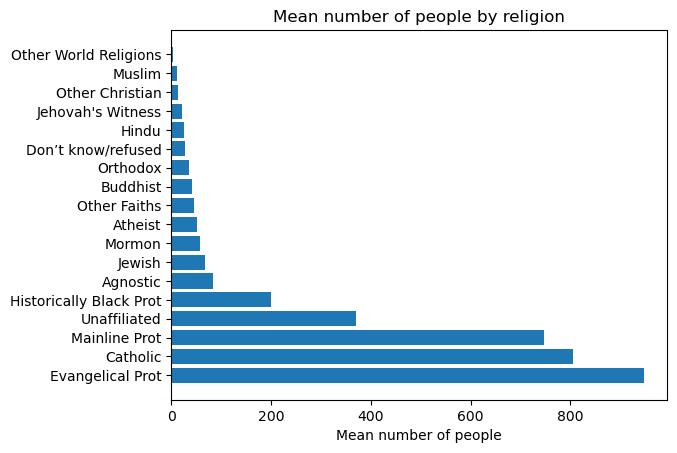

In [250]:
plt.barh(mean_counts_by_religion.index, mean_counts_by_religion)
plt.xlabel("Mean number of people")
plt.title("Mean number of people by religion")
plt.show()

In [256]:
# Here is an example of DataFrame creation in pandas
aggregates = {
    "religion": [],
    "min": [],
    "mean": [],
    "max": []
}

for religion, group_data in pew_tidy.groupby("religion"):
    print(religion, group_data.frequency.min(), group_data.frequency.mean(), group_data.frequency.max(), sep = ";")
    
    aggregates["religion"].append(religion)
    aggregates["min"].append(group_data.frequency.min())
    aggregates["mean"].append(group_data.frequency.mean())
    aggregates["max"].append(group_data.frequency.max())

Agnostic;27;82.6;137
Atheist;12;51.5;76
Buddhist;21;41.1;62
Catholic;418;805.4;1489
Don’t know/refused;10;27.2;116
Evangelical Prot;414;947.2;1529
Hindu;1;25.7;54
Historically Black Prot;78;199.5;339
Jehovah's Witness;6;21.5;37
Jewish;19;68.2;162
Mainline Prot;289;747.0;1328
Mormon;29;58.1;112
Muslim;6;11.6;23
Orthodox;13;36.3;73
Other Christian;7;12.9;18
Other Faiths;20;44.9;71
Other World Religions;2;4.2;8
Unaffiliated;217;370.7;597


In [258]:
pd.DataFrame(aggregates)

,religion,min,mean,max
0,Agnostic,27,82.6,137
1,Atheist,12,51.5,76
2,Buddhist,21,41.1,62
3,Catholic,418,805.4,1489
4,Don’t know/refused,10,27.2,116
5,Evangelical Prot,414,947.2,1529
6,Hindu,1,25.7,54
7,Historically Black Prot,78,199.5,339
8,Jehovah's Witness,6,21.5,37
9,Jewish,19,68.2,162


Check how the `.from_dict` and `.from_record` methods work

In [262]:
# if we want to split the dataset into two parts we could use the NOT operator
temperature_is_higher = weather_data_tidy.tmin > 15

In [260]:
weather_data_tidy[temperature_is_higher]

element,date,tmin,tmax
6,2010-03-10,16.8,34.5
7,2010-03-16,17.6,31.1
8,2010-04-27,16.7,36.3
9,2010-05-27,18.2,33.2
10,2010-06-17,17.5,28.0
11,2010-06-29,18.0,30.1
12,2010-07-03,17.5,28.6
13,2010-07-14,16.5,29.9
15,2010-08-05,15.8,29.6
16,2010-08-29,15.3,28.0


In [261]:
weather_data_tidy[~temperature_is_higher]

element,date,tmin,tmax
0,2010-01-30,14.5,27.8
1,2010-02-02,14.4,27.3
2,2010-02-03,14.4,24.1
3,2010-02-11,13.4,29.7
4,2010-02-23,10.7,29.9
5,2010-03-05,14.2,32.1
14,2010-08-23,15.0,26.4
21,2010-10-05,14.0,27.0
22,2010-10-14,13.0,29.5
23,2010-10-07,12.9,28.1


### 03. Cleaning Data
You've got the data... now what?

There is no common way of doing this. We always start with tidying. *(Sometimes we could skip it)* Every single operation is based on *"what we need this data for?"*. **Garbage in, garbage out!**. We have to keep in mind our target data.

How do we treat the `NaNs` or `nulls`. Sometimes replacing this values might be **dangerous**. If done properly, it will affect the data in a positive way.

Indentify and fix errors */outliars/* (it is also **dangerous**)

Here is one good `Pandas` [cheatsheet](https://github.com/pandas-dev/pandas/blob/main/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)  

In [275]:
us_weather_data = pd.read_csv("https://raw.githubusercontent.com/synesthesiam/blog/master/posts/data/weather_year.csv")

In [276]:
us_weather_data

,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2012-3-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-3-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-3-12,71,62,53,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-3-13,76,63,50,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-3-14,80,62,44,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.00,0,NaN,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2013-3-6,32,31,29,27,26,25,92,85,78,...,10,5,1,22,9,33.0,0.04,8,Snow,314
362,2013-3-7,36,32,28,27,25,22,85,71,56,...,10,9,6,8,2,12.0,0.00,8,NaN,342
363,2013-3-8,47,35,23,27,24,21,88,65,42,...,10,9,5,12,3,14.0,0.00,1,NaN,90
364,2013-3-9,56,45,33,32,29,23,75,57,38,...,10,10,10,16,10,24.0,T,2,NaN,141


In [277]:
us_weather_data.shape

(366, 23)

In [278]:
us_weather_data.dtypes

EDT                            object
Max TemperatureF                int64
Mean TemperatureF               int64
Min TemperatureF                int64
Max Dew PointF                  int64
MeanDew PointF                  int64
Min DewpointF                   int64
Max Humidity                    int64
 Mean Humidity                  int64
 Min Humidity                   int64
 Max Sea Level PressureIn     float64
 Mean Sea Level PressureIn    float64
 Min Sea Level PressureIn     float64
 Max VisibilityMiles            int64
 Mean VisibilityMiles           int64
 Min VisibilityMiles            int64
 Max Wind SpeedMPH              int64
 Mean Wind SpeedMPH             int64
 Max Gust SpeedMPH            float64
PrecipitationIn                object
 CloudCover                     int64
 Events                        object
 WindDirDegrees                 int64
dtype: object

In [279]:
us_weather_data.columns

Index(['EDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn',
       ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn',
       ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles',
       ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
       'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees'],
      dtype='object')

In [280]:
# Let's try to strip all the columns, so that there is no whitespace after the comma
us_weather_data.columns = [col.strip() for col in us_weather_data.columns]

In [281]:
us_weather_data.columns

Index(['EDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       'Mean Humidity', 'Min Humidity', 'Max Sea Level PressureIn',
       'Mean Sea Level PressureIn', 'Min Sea Level PressureIn',
       'Max VisibilityMiles', 'Mean VisibilityMiles', 'Min VisibilityMiles',
       'Max Wind SpeedMPH', 'Mean Wind SpeedMPH', 'Max Gust SpeedMPH',
       'PrecipitationIn', 'CloudCover', 'Events', 'WindDirDegrees'],
      dtype='object')

In [282]:
# Alternative variant to the previous exampe
us_weather_data = us_weather_data.rename(columns = lambda x: x.strip())

In [284]:
us_weather_data.dtypes

EDT                           object
Max TemperatureF               int64
Mean TemperatureF              int64
Min TemperatureF               int64
Max Dew PointF                 int64
MeanDew PointF                 int64
Min DewpointF                  int64
Max Humidity                   int64
Mean Humidity                  int64
Min Humidity                   int64
Max Sea Level PressureIn     float64
Mean Sea Level PressureIn    float64
Min Sea Level PressureIn     float64
Max VisibilityMiles            int64
Mean VisibilityMiles           int64
Min VisibilityMiles            int64
Max Wind SpeedMPH              int64
Mean Wind SpeedMPH             int64
Max Gust SpeedMPH            float64
PrecipitationIn               object
CloudCover                     int64
Events                        object
WindDirDegrees                 int64
dtype: object

In [285]:
us_weather_data.columns = [
    "date", "max_temp", "mean_temp", "min_temp", "max_dew",
    "mean_dew", "min_dew", "max_humidity", "mean_humidity",
    "min_humidity", "max_pressure", "mean_pressure",
    "min_pressure", "max_visibility", "mean_visibility",
    "min_visibility", "max_wind", "mean_wind", "max_gusts",
    "precipitation", "cloud_cover", "events", "wind_dir"
]

In [286]:
us_weather_data

,date,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,...,max_visibility,mean_visibility,min_visibility,max_wind,mean_wind,max_gusts,precipitation,cloud_cover,events,wind_dir
0,2012-3-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-3-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-3-12,71,62,53,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-3-13,76,63,50,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-3-14,80,62,44,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.00,0,NaN,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2013-3-6,32,31,29,27,26,25,92,85,78,...,10,5,1,22,9,33.0,0.04,8,Snow,314
362,2013-3-7,36,32,28,27,25,22,85,71,56,...,10,9,6,8,2,12.0,0.00,8,NaN,342
363,2013-3-8,47,35,23,27,24,21,88,65,42,...,10,9,5,12,3,14.0,0.00,1,NaN,90
364,2013-3-9,56,45,33,32,29,23,75,57,38,...,10,10,10,16,10,24.0,T,2,NaN,141


In [287]:
us_weather_data.describe().T

,count,mean,std,min,25%,50%,75%,max
max_temp,366.0,66.803279,20.361247,16.00,51.00,69.00,84.0000,106.00
mean_temp,366.0,55.683060,18.436506,11.00,41.00,59.00,70.7500,89.00
min_temp,366.0,44.101093,17.301141,1.00,30.00,47.00,57.7500,77.00
max_dew,366.0,49.549180,16.397178,0.00,36.00,54.50,62.0000,77.00
mean_dew,366.0,44.057377,16.829996,-3.00,30.00,48.00,57.0000,72.00
min_dew,366.0,37.980874,17.479449,-5.00,24.00,41.00,51.0000,71.00
max_humidity,366.0,90.027322,9.108438,54.00,85.00,93.00,96.0000,100.00
mean_humidity,366.0,67.860656,9.945591,37.00,61.25,68.00,74.0000,95.00
min_humidity,366.0,45.193989,15.360261,15.00,35.00,42.00,54.0000,90.00
max_pressure,366.0,30.108907,0.172189,29.64,29.99,30.10,30.2100,30.60


In [290]:
# Hm, we have an unknown "T"
us_weather_data.precipitation.unique()

array(['0.00', 'T', '0.03', '0.04', '0.14', '0.86', '0.06', '0.01',
       '0.51', '0.69', '1.45', '0.38', '0.19', '0.15', '0.49', '0.29',
       '0.09', '0.90', '0.02', '0.07', '0.13', '0.10', '0.36', '0.27',
       '0.16', '0.26', '0.31', '0.05', '0.32', '1.85', '0.53', '2.00',
       '0.92', '1.10', '0.17', '1.13', '0.63', '0.50', '0.71', '0.73',
       '1.52', '0.47', '0.39', '0.18', '0.77', '0.08', '0.33', '0.44',
       '0.48', '0.20', '0.12', '0.82', '1.16', '1.73', '0.40', '0.99',
       '0.30', '1.17'], dtype=object)

In [291]:
us_weather_data.loc[us_weather_data.precipitation == "T", "precipitation"] = 1e-4

In [292]:
us_weather_data.precipitation = us_weather_data.precipitation.astype(float)

In [294]:
# Now what would we do with the dates?
us_weather_data.date = pd.to_datetime(us_weather_data.date)

In [295]:
us_weather_data.date

0     2012-03-10
1     2012-03-11
2     2012-03-12
3     2012-03-13
4     2012-03-14
         ...    
361   2013-03-06
362   2013-03-07
363   2013-03-08
364   2013-03-09
365   2013-03-10
Name: date, Length: 366, dtype: datetime64[ns]

In [297]:
us_weather_data = us_weather_data.set_index("date")

In [298]:
us_weather_data

,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,max_pressure,...,max_visibility,mean_visibility,min_visibility,max_wind,mean_wind,max_gusts,precipitation,cloud_cover,events,wind_dir
date,,,,,,,,,,,,,,,,,,,,,
2012-03-10,56,40,24,24,20,16,74,50,26,30.53,...,10,10,10,13,6,17.0,0.0000,0,NaN,138
2012-03-11,67,49,30,43,31,24,78,53,28,30.37,...,10,10,10,22,7,32.0,0.0001,1,Rain,163
2012-03-12,71,62,53,59,55,43,90,76,61,30.13,...,10,10,6,24,14,36.0,0.0300,6,Rain,190
2012-03-13,76,63,50,57,53,47,93,66,38,30.12,...,10,10,4,16,5,24.0,0.0000,0,NaN,242
2012-03-14,80,62,44,58,52,43,93,68,42,30.15,...,10,10,10,16,6,22.0,0.0000,0,NaN,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-03-06,32,31,29,27,26,25,92,85,78,30.31,...,10,5,1,22,9,33.0,0.0400,8,Snow,314
2013-03-07,36,32,28,27,25,22,85,71,56,30.40,...,10,9,6,8,2,12.0,0.0000,8,NaN,342
2013-03-08,47,35,23,27,24,21,88,65,42,30.48,...,10,9,5,12,3,14.0,0.0000,1,NaN,90


In [300]:
us_weather_data[us_weather_data.max_temp > 80]

,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,max_pressure,...,max_visibility,mean_visibility,min_visibility,max_wind,mean_wind,max_gusts,precipitation,cloud_cover,events,wind_dir
date,,,,,,,,,,,,,,,,,,,,,
2012-03-19,84,72,59,58,56,50,90,66,42,30.09,...,10,10,10,17,6,23.0,0.00,1,NaN,165
2012-03-20,84,71,58,56,54,50,78,58,37,30.09,...,10,10,10,17,5,24.0,0.00,0,NaN,154
2012-03-21,84,71,57,56,54,52,84,58,32,30.14,...,10,10,10,17,6,23.0,0.00,1,NaN,152
2012-03-22,81,69,57,63,57,51,87,65,42,30.11,...,10,10,2,31,4,41.0,0.14,3,Rain,159
2012-03-30,81,66,51,61,50,42,78,59,39,29.93,...,10,10,10,25,11,37.0,0.01,4,Rain-Thunderstorm,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-05,85,74,63,72,67,64,100,83,65,29.94,...,10,6,0,17,3,26.0,0.92,3,Fog-Rain-Thunderstorm,236
2012-09-06,86,74,62,70,67,62,100,81,61,29.98,...,10,5,0,10,2,14.0,0.00,2,Fog,220
2012-09-07,89,77,65,70,67,64,100,73,46,29.93,...,10,4,0,23,5,33.0,1.10,3,Fog-Rain-Thunderstorm,197


In [301]:
us_weather_data[
    us_weather_data.columns[
        (us_weather_data.columns.str.contains("temp")) | 
        (us_weather_data.columns.str.contains("dew"))
    ]
]

,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew
date,,,,,,
2012-03-10,56,40,24,24,20,16
2012-03-11,67,49,30,43,31,24
2012-03-12,71,62,53,59,55,43
2012-03-13,76,63,50,57,53,47
2012-03-14,80,62,44,58,52,43
...,...,...,...,...,...,...
2013-03-06,32,31,29,27,26,25
2013-03-07,36,32,28,27,25,22
2013-03-08,47,35,23,27,24,21


In [302]:
# Now all that is left is to check the events column
us_weather_data.events

date
2012-03-10     NaN
2012-03-11    Rain
2012-03-12    Rain
2012-03-13     NaN
2012-03-14     NaN
              ... 
2013-03-06    Snow
2013-03-07     NaN
2013-03-08     NaN
2013-03-09     NaN
2013-03-10     NaN
Name: events, Length: 366, dtype: object

In [303]:
us_weather_data.events.count()

162

In [304]:
us_weather_data.events.unique()

array([nan, 'Rain', 'Rain-Thunderstorm', 'Fog-Thunderstorm', 'Fog-Rain',
       'Thunderstorm', 'Fog-Rain-Thunderstorm', 'Fog', 'Fog-Rain-Snow',
       'Fog-Rain-Snow-Thunderstorm', 'Fog-Snow', 'Snow', 'Rain-Snow'],
      dtype=object)

In [305]:
us_weather_data.cloud_cover.unique()

array([0, 1, 6, 3, 2, 7, 5, 4, 8])

In [309]:
for (cloud_cover, events), group_data in us_weather_data.groupby(["cloud_cover", "events"]):
    print(cloud_cover, events, len(group_data))

0 Fog 2
0 Rain 2
0 Thunderstorm 1
1 Fog 5
1 Fog-Rain 1
1 Rain 4
1 Rain-Thunderstorm 2
1 Thunderstorm 6
2 Fog 1
2 Rain 5
2 Rain-Thunderstorm 4
2 Snow 1
2 Thunderstorm 2
3 Fog 2
3 Fog-Rain-Thunderstorm 3
3 Fog-Thunderstorm 1
3 Rain 9
3 Rain-Thunderstorm 4
3 Snow 1
4 Fog 3
4 Fog-Rain 2
4 Fog-Rain-Thunderstorm 2
4 Rain 10
4 Rain-Thunderstorm 6
4 Snow 1
5 Fog-Rain 1
5 Fog-Rain-Snow 1
5 Rain 13
5 Rain-Thunderstorm 3
5 Snow 2
6 Fog-Rain 2
6 Fog-Rain-Snow 1
6 Fog-Rain-Thunderstorm 2
6 Rain 9
6 Rain-Thunderstorm 4
6 Snow 1
7 Fog-Rain 1
7 Fog-Rain-Thunderstorm 1
7 Fog-Snow 3
7 Rain 6
7 Rain-Thunderstorm 3
7 Snow 1
8 Fog-Rain 4
8 Fog-Rain-Snow 1
8 Fog-Rain-Snow-Thunderstorm 1
8 Fog-Snow 2
8 Rain 11
8 Rain-Snow 3
8 Snow 6


In [310]:
us_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2012-03-10 to 2013-03-10
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   max_temp         366 non-null    int64  
 1   mean_temp        366 non-null    int64  
 2   min_temp         366 non-null    int64  
 3   max_dew          366 non-null    int64  
 4   mean_dew         366 non-null    int64  
 5   min_dew          366 non-null    int64  
 6   max_humidity     366 non-null    int64  
 7   mean_humidity    366 non-null    int64  
 8   min_humidity     366 non-null    int64  
 9   max_pressure     366 non-null    float64
 10  mean_pressure    366 non-null    float64
 11  min_pressure     366 non-null    float64
 12  max_visibility   366 non-null    int64  
 13  mean_visibility  366 non-null    int64  
 14  min_visibility   366 non-null    int64  
 15  max_wind         366 non-null    int64  
 16  mean_wind        366 non-null    int64  
 1

### 04. Outliers and Errors
"Out, liar!!"

#### Transformations on features
* The quality of our results depends strongly on the features we use
    * "Garbage in - garbage out"
* **Dimensionality reduction**
    * Reducing the number of variables (features)
    * We can do this manually or use algorithms
    * **Feature selection**
        * Selecting only columns that are useful
    * **Feature extraction**
        * Transforming non-structured to structured data
            * Example: Images, Text, etc.
        * Getting meaningful features
* **Feature engineering**
    * Using our knowledge of the data to create meaningful features
        * Involves a lot of brainstorming and testing

Date: 22.06.2023